## Litics360 Prototype Version Pv1.0
--------------------------------------------------------------------------------------------------------------------
# Test Final ML model with Blind Dataset for predicting Voter's Party Affiliation

--------------------------------------------------------------------------------------------------------------------

## 1. Import dataset for testing model (blind_voterdata.csv)
### Brief scope of tasks:
    1.1 Import necessary libraries
    1.2 Import target datafile

In [36]:
#------------------------------------------------------------------------------------------
    #1.1 Import necessary libraries
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n1.1 Importing necessary libraries ...')
import pandas as pd
print('Import --> COMPLETED')

#------------------------------------------------------------------------------------------
    #1.2 Import target datafile
#------------------------------------------------------------------------------------------

filename = "VoterData/Blind/blind_voterdata.csv"
print('\n--------------------------------\n1.2 Importing datafile --> ', filename)

# Data Import
voter_df = pd.read_csv(filename,sep=",", quotechar='"', header=0, encoding='ISO-8859-1', na_values=['NA'],low_memory=False)
print('Import --> COMPLETED')


--------------------------------
1.1 Importing necessary libraries ...
Import --> COMPLETED

--------------------------------
1.2 Importing datafile -->  VoterData/Blind/blind_voterdata.csv
Import --> COMPLETED


--------------------------------------------------------------------------------------------------------------------

## 2. Data wrangling/cleaning

### Brief scope of tasks:
    2.1:  Import necessary libraries
    2.2:  Preview dataset information
    2.3:  Data cleaning --> Drop unncessary features/voters
        2.3.1: Cols: Demographic features with over 90% missing values
        2.3.2: Cols: RESIDENTIAL_ADDRESS1, RESIDENTIAL_SECONDARY_ADDR, RESIDENTIAL_STATE, CAREER_CENTER, CITY
        2.3.3: Rows: Keep only Republican/Democrat declared voters and undeclared voters of their party affiliation
    2.4:  Data cleaning --> Feature = SOS_VOTERID
        2.4.1: Remove OH and convert to numeric dtype
    2.5: Data cleaning --> Feature = DATE_OF_BIRTH & REGISTRATION_DATE
        2.5.1: Convert dtype to datetime for following columns/features
        2.5.2: Calculate voter age and registration age
        2.5.3: Convert age columns to numeric
        2.5.4: Drop columns DATE_OF_BIRTH & REGISTRATION_DATE
    2.6: Drop most important feature i.e. PRIMARY-03/15/2016
    2.7: Data cleaning --> Feature = PARTY_AFFILIATION & VOTER TURNOUT
        2.7.1 Convert all values to numeric coded in voter turnout features [6:-4]
        2.7.2 Convert PARTY_AFFILIATION values D/R to numeric
        2.7.3 Convert CD_REP_PARTY values to numeric
    
        ------ Conversion key ------
            0 - D  -- Democrat party
            1 - R  -- Republican party
            2 - C  -- Constitution party
            3 - E  -- Reform party
            4 - G  -- Green party
            5 - L  -- Libertarian party
            6 - N  -- Natural Law party
            7 - S  -- Socialist party
            8 - X  -- Voted without declaring party affiliation
            9 - NA -- No voting record
            
     2.8  Prep for ML --  Encode data and export into csv

In [37]:
#------------------------------------------------------------------------------------------
    #2.1 Import necessary libraries
#------------------------------------------------------------------------------------------
print('\n--------------------------------\n2.1 Importing necessary libraries ...')
import numpy as np
import pandas as pd
print('Import --> COMPLETED')

#------------------------------------------------------------------------------------------
    #2.2: Preview dataset information
#------------------------------------------------------------------------------------------

df = voter_df

#Preview changes -- Compare original #rows to current #rows
print('\n--------------------------------\n2.2 Previewing dataset information ...')

#Current row count
row_ct1 = df.shape[0]
#Current col count
col_ct1 = df.shape[1]

#Number of rows, columns
print ("\n# of Registered Voters: ", row_ct1)
print ("\n# of Features: ", col_ct1)

#Unique types of party affiliations listed in dataset
parties = df.PARTY_AFFILIATION.unique()
print("\nParty Affiliations Listed Types: ", parties)
print("--> nan = Undeclared\n--> D = Democrat\n--> R = Republican\n--> G = Green\n--> L = Libertarian")

#Number of undeclared/declared voters
num_undeclaredvoters = sum(pd.isna(df['PARTY_AFFILIATION']))
print("\n# of Undeclared Party Affiliation: ", num_undeclaredvoters)

num_declaredvoters = len(df)-(sum(pd.isna(df['PARTY_AFFILIATION'])))
print("# of Declared Party Affiliation: ", num_declaredvoters)

print('\n---> END OF PREVIEW <---\n')


--------------------------------
2.1 Importing necessary libraries ...
Import --> COMPLETED

--------------------------------
2.2 Previewing dataset information ...

# of Registered Voters:  777179

# of Features:  112

Party Affiliations Listed Types:  [nan 'R' 'D' 'G' 'L']
--> nan = Undeclared
--> D = Democrat
--> R = Republican
--> G = Green
--> L = Libertarian

# of Undeclared Party Affiliation:  456632
# of Declared Party Affiliation:  320547

---> END OF PREVIEW <---



In [38]:
#------------------------------------------------------------------------------------------  
    #2.3: Data cleaning --> Drop unnecessary features/voters
#------------------------------------------------------------------------------------------  

print('\n--------------------------------\n2.3  Start data cleaning --> Dropping unnecessary features/voters...')

#2.3.1: Drop demographic features with over 90% missing values
#Demographic features list
features = list(df)
dem_features = features[:46]
#Missing values for each feature - Output:Number of missing values
num_na = np.array(df.isna().sum())
#Demographic feature and number of na
dem_df  = pd.DataFrame(list(zip(dem_features, num_na)),
                       columns = ['feature','num_na'])
#90%  of missing values count for any given dataframe
na_pct = 0.9 * len(df)
#List of demographic feature columns to drop: If number of missing values for feature is over 80000
drop_dem_features = dem_df.loc[dem_df['num_na'] > na_pct]
#Drop the columns that are in the list of features with over 80000 missing values
df = df.drop(labels=drop_dem_features.feature, axis=1)
print('\n\t2.3.1  Drop demographic features with over 90% missing values --> COMPLETED')

#2.3.2: Drop other features
df = df.drop(["LAST_NAME","FIRST_NAME","MIDDLE_NAME","VOTER_STATUS","RESIDENTIAL_ADDRESS1",
              "RESIDENTIAL_CITY","RESIDENTIAL_STATE",'RESIDENTIAL_SECONDARY_ADDR',"RESIDENTIAL_ZIP","CAREER_CENTER",'CITY','CITY_SCHOOL_DISTRICT','COURT_OF_APPEALS',
              'EDU_SERVICE_CENTER_DISTRICT','LOCAL_SCHOOL_DISTRICT','MUNICIPAL_COURT_DISTRICT','PRECINCT_NAME',
              'PRECINCT_CODE','STATE_BOARD_OF_EDUCATION','STATE_REPRESENTATIVE_DISTRICT','STATE_SENATE_DISTRICT',
              'TOWNSHIP','WARD','CD_REP_NAME'], axis=1)
print('\n\t2.3.2  Drop other uncessary features --> COMPLETED')

#2.3.3: Rows: Keep only Republican/Democrat registered party_affliation and NAN
df = df[(df.PARTY_AFFILIATION == 'R') | (df.PARTY_AFFILIATION == 'D')]
print('\n\t2.3.3  Extract voters with D/R --> COMPLETED')    

#Preview changes -- Compare original #rows to current #rows
#Current row count
row_ct2 = df.shape[0]
print("\n---Original # of voters:", row_ct1,
      "\n---Current # of voters:", row_ct2)

#Current col count
col_ct2 = df.shape[1]
#Preview changes -- Compare original #columns to current #columns
print("\n---Original # of features:", col_ct1,
      "\n---Current # of features:", col_ct2)
print('\nClean --> COMPLETED')


--------------------------------
2.3  Start data cleaning --> Dropping unnecessary features/voters...

	2.3.1  Drop demographic features with over 90% missing values --> COMPLETED

	2.3.2  Drop other uncessary features --> COMPLETED

	2.3.3  Extract voters with D/R --> COMPLETED

---Original # of voters: 777179 
---Current # of voters: 319925

---Original # of features: 112 
---Current # of features: 72

Clean --> COMPLETED


In [39]:
#------------------------------------------------------------------------------------------  
    #2.4: Data cleaning --> Feature = SOS_VOTERID
#------------------------------------------------------------------------------------------  

print('\n--------------------------------\n2.4  Start data cleaning --> Feature = SOS_VOTERID')
#2.4.1 = Make SOS_VOTERID a numeric feature -- get rid of first two letters OH
df['SOS_VOTERID'] = df['SOS_VOTERID'].str[2:]
df['SOS_VOTERID'] = df['SOS_VOTERID'].astype(int)
print('\nClean --> COMPLETED')

#------------------------------------------------------------------------------------------
    #2.5  Data cleaning --> Feature = DATE_OF_BIRTH & REGISTRATION_DATE
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n2.5  Start data cleaning --> Feature = DATE_OF_BIRTH & REGISTRATION_DATE')
#2.5.1  = object to datetime ---- DATE_OF_BIRTH & REGISTRATION_DATE
#--DATE_OF_BIRTH
df['DATE_OF_BIRTH']= pd.to_datetime(df['DATE_OF_BIRTH'])
#--REGISTRATION_DATE
df['REGISTRATION_DATE']= pd.to_datetime(df['REGISTRATION_DATE'])

#2.5.2  = Calculate voter age and registration age
#Current datetime
now = pd.to_datetime('now')
#--Calculate VOTER_AGE
df['VOTER_AGE'] = (now - df['DATE_OF_BIRTH']).astype('<m8[Y]') 
#--Calculate REGISTRATION_AGE
df['REGISTRATION_AGE'] = (now - df['REGISTRATION_DATE']).astype('<m8[Y]') 

#2.5.3 = Convert age columns to INT64
#--VOTER_AGE
df['VOTER_AGE'] = df['VOTER_AGE'].astype(int) 
#--REGISTRATION_AGE
df['REGISTRATION_AGE'] = df['REGISTRATION_AGE'].astype(int)

#2.5.4  = Drop columns DATE_OF_BIRTH & REGISTRATION_DATE
df = df.drop(["DATE_OF_BIRTH", "REGISTRATION_DATE",], axis=1)
print('\nClean --> COMPLETED')


--------------------------------
2.4  Start data cleaning --> Feature = SOS_VOTERID

Clean --> COMPLETED

--------------------------------
2.5  Start data cleaning --> Feature = DATE_OF_BIRTH & REGISTRATION_DATE

Clean --> COMPLETED


In [40]:
#------------------------------------------------------------------------------------------
    #2.6  Data cleaning --> Drop most important feature = PRIMARY-03/15/2016
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n2.6  Start Data cleaning --> Drop most important feature = PRIMARY-03/15/2016')

df = df.drop(['PRIMARY-03/15/2016'], axis=1)
print('\nClean --> COMPLETED')


--------------------------------
2.6  Start Data cleaning --> Drop most important feature = PRIMARY-03/15/2016

Clean --> COMPLETED


In [41]:
#------------------------------------------------------------------------------------------
    #2.7  Data cleaning --> Feature = PARTY_AFFILIATION & VOTER TURNOUT
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n2.7  Start data cleaning --> Feature = PARTY_AFFILIATION & VOTER TURNOUT')
#Create party conversion key
party_key = {'D':0,'R':1,'C':2,'E':3,'G':4,'L':5,'N':6,'S':7,'X':8,np.NaN:9}

#2.6.1 = Convert Voter Turnout feature [6:-4]
for col in (df.iloc[:,5:-4]):
    df[col] = df[col].map(party_key)
    
#2.6.2 = Convert PARTY_AFFILIATION values D/R to numeric
df['PARTY_AFFILIATION'] = df.PARTY_AFFILIATION.map(party_key)

#2.6.3 = Convert CD_REP_PARTY values to numeric
df['CD_REP_PARTY'] = df.CD_REP_PARTY.map(party_key)

#Preview changes
print("\nPARTY_AFFILIATION contains values:", df.PARTY_AFFILIATION.unique(),
     "\nCD_REP_PARTY contains values:", df.CD_REP_PARTY.unique())

#Preview changes -- Compare original #rows to current #rows
#Current row count
row_ct2 = df.shape[0]
print("\n---Original # of rows:", row_ct1,
      "\n---Current # of rows:", row_ct2)

df = df.apply(pd.to_numeric)

print('\nClean --> COMPLETED')


--------------------------------
2.7  Start data cleaning --> Feature = PARTY_AFFILIATION & VOTER TURNOUT

PARTY_AFFILIATION contains values: [1 0] 
CD_REP_PARTY contains values: [1 0]

---Original # of rows: 777179 
---Current # of rows: 319925

Clean --> COMPLETED


In [42]:
#------------------------------------------------------------------------------------------
    #2.8  Prep for ML --  Encode data and export into csv
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n2.8  Encode and export clean data into csv')
#Rename PARTY_AFFILIATION as target class
df.rename(columns={'PARTY_AFFILIATION':'class'}, inplace=True)

#Convert textural feature data (i.e. all feature-columns -- all columns except PARTY_AFFILIATION
df_features = pd.get_dummies(df.loc[:,df.columns!="class"])

#Assign binary class data (i.e. class-column -- column PARTY_AFFILIATION)
df_class = df['class']

#Features for prediction =  X; Data for prediction class = Y
X = df_features
Y = df_class

#Number of rows, columns
print ("Preview shape of FEATURES df: ",(X.shape))
print ("Preview shape of CLASS df: ",(Y.shape))

#Function for easy export to csv
def df2csv(df,filename):
    path = 'VoterData/'+filename+'_voterdata.csv'
    df.to_csv(path, encoding='utf-8', mode='a', header=True, index=False)

#Run function to export
print('\nCreating file: clean_DF_voterdata.csv')
df2csv(df, 'Blind/blind_clean_DF')
print('File --> COMPLETED')

print('\nCreating file: clean_X_voterdata.csv')
df2csv(X, 'Blind/blind_clean_X')
print('File --> COMPLETED')

print('\nCreating file: clean_Y_voterdata.csv')
df2csv(Y, 'Blind/blind_clean_Y')
print('File --> COMPLETED')

print('\nEncode/export --> COMPLETED')


--------------------------------
2.8  Encode and export clean data into csv
Preview shape of FEATURES df:  (319925, 70)
Preview shape of CLASS df:  (319925,)

Creating file: clean_DF_voterdata.csv
File --> COMPLETED

Creating file: clean_X_voterdata.csv
File --> COMPLETED

Creating file: clean_Y_voterdata.csv
File --> COMPLETED

Encode/export --> COMPLETED


--------------------------------------------------------------------------------------------------------------------
# 3. Prep for running machine learning models

### Brief scope of tasks:
    3.1: Import necesary libraries
    3.2: Import X & Y values into dataframes
    3.3: Create features variable for checking feature importance lists
    3.4: Split X and Y into training and testing data
    3.5: Initialize function: evaluate_model
    3.6: Initialize function: plot_confusion_matrix

In [43]:
#------------------------------------------------------------------------------------------
    #3.1 Import necessary libraries
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n3.1 Importing necessary libraries ...')
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

print('Import --> COMPLETED')

#------------------------------------------------------------------------------------------
    #3.2 Import X & Y values into dataframes *** CHANGE filename WHEN NEEDED ***
#------------------------------------------------------------------------------------------

filenameX = "VoterData/Blind/blind_clean_X_voterdata.csv"
filenameY = "VoterData/Blind/blind_clean_Y_voterdata.csv"

print('\n--------------------------------\n3.2 Importing datafiles into X&Y')
#Import ML-ready file for quick processing -- features into X
X = pd.read_csv(filenameX,
               sep=",", quotechar='"', header=0, encoding='ISO-8859-1', na_values=['NA'],low_memory=False)
print('Import ',filenameX,' --> COMPLETED')
#Import ML-ready file for quick processing -- class into Y
Y = pd.read_csv(filenameY,
               sep=",", quotechar='"', header=0, encoding='ISO-8859-1', na_values=['NA'],low_memory=False)
print('Import ',filenameY,' --> COMPLETED')

#------------------------------------------------------------------------------------------
    #3.3 Create features variable for checking feature importance lists
#------------------------------------------------------------------------------------------
print('\n--------------------------------\n3.3 Create features variable for checking feature importance lists')
# Features for feature importances
features = list(X.columns.values)
print('\nFeature --> COMPLETED')

#------------------------------------------------------------------------------------------
    #3.4 Split X and Y into training and testing data
#------------------------------------------------------------------------------------------
print('\n--------------------------------\n3.4 Split X and Y into training and testing datasets')
#Split for train and testing
x_train,x_test,y_train,y_test=train_test_split(X, Y.values.ravel(), test_size=0.3)
print('\nTest/train split --> COMPLETED')

#------------------------------------------------------------------------------------------
    #3.5 Initialize function: decision_tree
#------------------------------------------------------------------------------------------
print('\n--------------------------------\n3.5 Initialize function: decision_tree')
#Pass arguments: X_train, Y_train, X_test, Y_test, max_depth, criterion
def decision_tree(x, y, X, Y, mD, c): 
    
    #Create DecisionTreeClassifier with max_depths(None, 1-5) and criterion(gini, entropy)
    dt_clf = DecisionTreeClassifier(max_depth=mD, criterion=c) 
    
    #Fit X_train, Y_train into Classifier
    dt_clf.fit(x, y)
    
    #Predict Y-class for X_test
    predictions = dt_clf.predict(X)
    
    #Get accuracy_score of predicted Y-class from above, by comparing them to Y_true class values
    score = (accuracy_score(Y, predictions))
    
    # Probabilities for each class
    probabilities = dt_clf.predict_proba(X)[:, 1]
    
    # Calculate roc auc
    roc_score = roc_auc_score(Y, probabilities)

    #Return max_depth value, criterion, and accuracy scores
    return mD, c, score, roc_score

#Function to visualize decision tree with train set
#Pass arguments: X_train, Y_train, max_depth, criterion
def visualize_train(x, y, mD, c):
    
    #Create DecisionTreeClassifier with max_depths(None, 1-5) and criterion(gini, entropy)
    dtree_clf = DecisionTreeClassifier(max_depth=mD, criterion=c)
    
    #Fit X_train, Y_train into Classifier
    dtree_clf.fit(x, y)
    
    #Visualize with graphviz
    dot_data = StringIO()
    export_graphviz(
        dtree_clf, #Fitted Decision Tree
        out_file=dot_data,
        feature_names=x.columns, #Feature names - X column names
        class_names=["0","1"], #Class 0/1
        special_characters = True,
        rounded=True,
        filled=True
    )
    
    #Plot graph
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    #Print statement to show info about graph
    print("\n\n\tDecision Tree for X_train, Y_train", "\n\tmax_depth=", mD, "criterion=", c)
    
    #Create PNG image of plotted graph
    image=Image(graph.create_png())
    
    #Return Image
    return image;

#Function to visualize decision tree with test set
#Pass arguments: X_test, Y_test, max_depth, criterion
def visualize_test(x, y, mD, c):
    
    #Create DecisionTreeClassifier with max_depths(None, 1-5) and criterion(gini, entropy)
    dtree_clf = DecisionTreeClassifier(max_depth=mD, criterion=c)
    
    #Fit X_train, Y_train into Classifier
    dtree_clf.fit(x, y)
    
    #Visualize with graphviz
    dot_data = StringIO()
    export_graphviz(
        dtree_clf, #Fitted Decision Tree
        out_file=dot_data,
        feature_names=x.columns, #Feature names - X column names
        class_names=["0","1"], #Class 0/1
        special_characters = True,
        rounded=True,
        filled=True
    )
    
    #Plot graph
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    #Print statement to show info about graph
    print("\n\n\tDecision Tree for X_test, Y_test", "\n\tmax_depth=", mD, "criterion=", c)
    
    #Create PNG image of plotted graph
    image=Image(graph.create_png())
    
    #Return Image
    return image;

print('\nFunction --> COMPLETED')

#------------------------------------------------------------------------------------------
    #3.6 Initialize function: evaluate_model
#------------------------------------------------------------------------------------------
print('\n--------------------------------\n3.6 Initialize function: evaluate_model')
def evaluate_model(predictions, probs, train_predictions, train_probs, Y_test, Y_train):
    
    baseline = {}
    
    baseline['recall'] = recall_score(Y_test, 
                                     [1 for _ in range(len(Y_test))])
    baseline['precision'] = precision_score(Y_test, 
                                      [1 for _ in range(len(Y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(Y_test, predictions)
    results['precision'] = precision_score(Y_test, predictions)
    results['roc'] = roc_auc_score(Y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(Y_train, train_predictions)
    train_results['precision'] = precision_score(Y_train, train_predictions)
    train_results['roc'] = roc_auc_score(Y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'\n{metric.capitalize()} \nBaseline: {round(baseline[metric], 4)} \nTest: {round(results[metric], 4)} \nTrain: {round(train_results[metric], 4)}','\n')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(Y_test, [1 for _ in range(len(Y_test))])
    model_fpr, model_tpr, _ = roc_curve(Y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();
print('\nFunction --> COMPLETED')

#------------------------------------------------------------------------------------------
    #3.7 Initialize function: plot_confusion_matrix
#------------------------------------------------------------------------------------------
print('\n--------------------------------\n3.7 Initialize function: plot_confusion_matrix')
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    Printing and plotting confusion matrix.
    Normalization applied with `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
print('\nFunction --> COMPLETED')


--------------------------------
3.1 Importing necessary libraries ...
Import --> COMPLETED

--------------------------------
3.2 Importing datafiles into X&Y
Import  VoterData/Blind/blind_clean_X_voterdata.csv  --> COMPLETED
Import  VoterData/Blind/blind_clean_Y_voterdata.csv  --> COMPLETED

--------------------------------
3.3 Create features variable for checking feature importance lists

Feature --> COMPLETED

--------------------------------
3.4 Split X and Y into training and testing datasets

Test/train split --> COMPLETED

--------------------------------
3.5 Initialize function: decision_tree

Function --> COMPLETED

--------------------------------
3.6 Initialize function: evaluate_model

Function --> COMPLETED

--------------------------------
3.7 Initialize function: plot_confusion_matrix

Function --> COMPLETED


In [44]:
#------------------------------------------------------------------------------------------
    #4.1 Import necessary libraries
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n4.1 Importing necessary libraries ...')
#Import libraries for Decision Tree and Metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder

#Import libraries for visualization
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
print('Import --> COMPLETED')

#------------------------------------------------------------------------------------------
    #4.2 Create and fit decision tree model
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n4.2 Creating/fitting decision tree model ...')

print('Model: Create --> COMPLETED')
#Create DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=None, criterion="gini")

#Fit X_train, Y_train into Classifier
dt_clf.fit(x_train,y_train)
print('Model: Fit --> COMPLETED')

# Extract feature importances
fi_dt = pd.DataFrame({'feature': features,
                   'importance': dt_clf.feature_importances_}).\
                    sort_values('importance', ascending = False)

print('\nPreview --> Feature importance: first 5')
# Display feature importance
print(fi_dt.head(5))

#------------------------------------------------------------------------------------------
    #4.3 Calculate results
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n4.3 Calculate results')

#Create list for result values
dt_results = []

#Run dt function for max_depth=None & criterion=gini
dt_results.append(decision_tree(x_train, y_train, x_test, y_test, mD=None, c="gini")) #Append to results list

#Run dt function for max_depth=None and criterion=entropy
dt_results.append(decision_tree(x_train, y_train, x_test, y_test, mD=None, c="entropy")) #Append to results list

#Loop through 1-11 for applying max_depth
for i in range (1,11):
    
    #Run dt function for max_depth=(1to11) and criterion=gini
    dt_results.append(decision_tree(x_train, y_train, x_test, y_test, mD=i, c="gini")) #Append to results list
    
    #Run dt function for max_depth=(1to11) and criterion=gini
    dt_results.append(decision_tree(x_train, y_train, x_test, y_test, mD=i, c="entropy")) #Append to results list
    
print('Calculate results --> COMPLETED')

#------------------------------------------------------------------------------------------
    #4.4 Display results
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n4.4 Displaying performance results ...')
#Import PrettyTable library for visualizing table
from prettytable import PrettyTable

#Run PrettyTable and assign to table
dt_table = PrettyTable()

#Create headers for table 
dt_table.field_names = ["max_depth", "criterion", "accuracy", "roc_auc accuracy"]

#Loop through x12 to add 12 rows
for i in range (0,20): 
    
    #Results are in following order max_depth, criterion, accuracy, roc_auc accuracy. 
    #First position of tuple = row number, second position of  tuple = field
    #Iterate through first position
    dt_table.add_row([dt_results[i][0],dt_results[i][1],dt_results[i][2],dt_results[i][3]])

#Print table
print("\nModel Results: Decision Tree Classifier\n\n",dt_table)


--------------------------------
4.1 Importing necessary libraries ...
Import --> COMPLETED

--------------------------------
4.2 Creating/fitting decision tree model ...
Model: Create --> COMPLETED


/Users/sumimahmud/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Model: Fit --> COMPLETED

Preview --> Feature importance: first 5
               feature  importance
59  PRIMARY-05/08/2018    0.485945
26  PRIMARY-03/04/2008    0.076316
2            COUNTY_ID    0.056209
0          SOS_VOTERID    0.055338
68           VOTER_AGE    0.047726

--------------------------------
4.3 Calculate results
Calculate results --> COMPLETED

--------------------------------
4.4 Displaying performance results ...

Model Results: Decision Tree Classifier

 +-----------+-----------+--------------------+--------------------+
| max_depth | criterion |      accuracy      |  roc_auc accuracy  |
+-----------+-----------+--------------------+--------------------+
|    None   |    gini   | 0.8469545104086353 | 0.8420419081837158 |
|    None   |  entropy  | 0.8494863406197254 | 0.8447095407391404 |
|     1     |    gini   | 0.8025797578611765 | 0.7597974450796376 |
|     1     |  entropy  | 0.8025797578611765 | 0.7597974450796376 |
|     2     |    gini   | 0.8025797578611765


--------------------------------
5.1 Importing necessary libraries ...
Import --> COMPLETED

--------------------------------
5.2Creating/fitting random forest(RF) model ...
Model: Create --> COMPLETED


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Model: Fit --> COMPLETED

Preview --> Feature importance: first 5
               feature  importance
59  PRIMARY-05/08/2018    0.398639
26  PRIMARY-03/04/2008    0.100348
42  PRIMARY-03/06/2012    0.096881
48  PRIMARY-05/06/2014    0.071080
35  PRIMARY-05/04/2010    0.056570

--------------------------------
5.3 Prep for training RF for results
Average number of nodes: 2481
Average maximum depth: 29


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


RF prep --> COMPLETED

--------------------------------
5.4 Evaluate RF model --> display results

Recall 
Baseline: 1.0 
Test: 0.9227 
Train: 0.9267 


Precision 
Baseline: 0.5895 
Test: 0.8812 
Train: 0.8841 


Roc 
Baseline: 0.5 
Test: 0.9572 
Train: 0.9602 



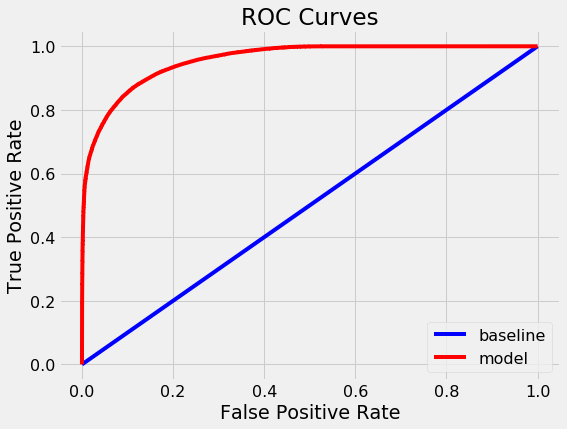


--------------------------------
5.5 Run Confusion matrix --> display results
Normalized confusion matrix
[[0.82142132 0.17857868]
 [0.07725618 0.92274382]]


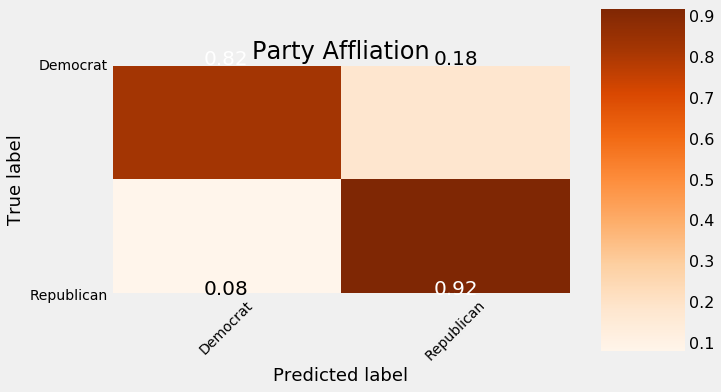

In [46]:
#------------------------------------------------------------------------------------------
    #5.1 Import necessary libraries
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n5.1 Importing necessary libraries ...')
#Import libraries for Random Forest and Metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
print('Import --> COMPLETED')

#------------------------------------------------------------------------------------------
    #5.2 Create/Fit
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n5.2Creating/fitting random forest(RF) model ...')
#Random State variable for RandomForestClassifier
RSEED = 50

# Create RandomForestClassifier with 100 trees
rf_clf = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1, min_samples_leaf = 50)
print('Model: Create --> COMPLETED')
# Fit on training data
rf_clf.fit(x_train, y_train)
print('Model: Fit --> COMPLETED')

# Extract feature importances
fi_rf = pd.DataFrame({'feature': features,
                   'importance': rf_clf.feature_importances_}).\
                    sort_values('importance', ascending = False)
# Display feature importances 
print('\nPreview --> Feature importance: first 5')
print(fi_rf.head(5))

#------------------------------------------------------------------------------------------
    #5.3 Prep for training RF model
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n5.3 Prep for training RF for results')
#Stats variables
n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in rf_clf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Average maximum depth: {int(np.mean(max_depths))}')

# Training predictions (to demonstrate overfitting)
train_rf_predictions = rf_clf.predict(x_train)
train_rf_probs = rf_clf.predict_proba(x_train)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = rf_clf.predict(x_test)
rf_probs = rf_clf.predict_proba(x_test)[:, 1]

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

print('RF prep --> COMPLETED')

#------------------------------------------------------------------------------------------
    #5.4 Evaluate RF model --> display results
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n5.4 Evaluate RF model --> display results')
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs, y_test, y_train)

#------------------------------------------------------------------------------------------
    #5.5 Run Confusion matrix --> display results
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n5.5 Run Confusion matrix --> display results')
# Confusion matrix
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['Democrat', 'Republican'],
                      title = 'Party Affliation')

--------------------------------------------------------------------------------------------------------------------
# 4. Model: Gradient boosting classifier with XGboost using Gridsearch

### Brief scope of tasks:
    4.1: Import necesary libraries
    4.2: XGBoost model fit with best estimator
    4.3: Prep for training XGB model
    4.4: Evaluate XGB model --> display results
    4.5: Run Confusion matrix --> display results

In [49]:
#------------------------------------------------------------------------------------------
    #6.1 Import necessary libraries
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n6.1 Importing necessary libraries ...')
#Import libraries for XGBClassifier and Metrics
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from statistics import mode
import re
from sklearn.model_selection import GridSearchCV
import xgboost
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
%matplotlib inline
print('Import --> COMPLETED')

#------------------------------------------------------------------------------------------
    #6.2 Create XGBoost classifier model and set hyperparameters
#------------------------------------------------------------------------------------------
print('\n--------------------------------\n6.2 Creating XGBoost classifier model and set hyperparameters ...')
# Create XGboost with XGBclassifier model
xgb = xgboost.XGBClassifier()
print('Model: Create --> COMPLETED')

n_estimators = [10, 100, 250, 500]
learning_rate = [0.01,0.025,0.05,0.075,0.1,0.25,0.5,0.75,1.0]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

print('\n\tParameters: ', param_grid)


--------------------------------
6.1 Importing necessary libraries ...
Import --> COMPLETED

--------------------------------
6.2 Creating XGBoost classifier model and set hyperparameters ...
Model: Create --> COMPLETED

	Parameters:  {'learning_rate': [0.001, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1.0], 'n_estimators': [10, 100, 250, 500]}


In [50]:
#------------------------------------------------------------------------------------------
    #6.3 Fitting Gridsearch to find XGB estimator and performance scores
#------------------------------------------------------------------------------------------
# Gridsearch
xgb_gridsearch = GridSearchCV(xgb, param_grid, scoring='neg_log_loss', n_jobs=-1, cv=3)
print('XGB with gridsearch model --> COMPLETED')

print('\n--------------------------------\n6.3 Starting Gridsearch to find XGB estimator ...')
xgb_gridsearch = xgb_gridsearch.fit(x_train, y_train)
print('Model: Fit w/Gridsearch --> COMPLETED')

XGB with gridsearch model --> COMPLETED

--------------------------------
6.3 Starting Gridsearch to find XGB estimator ...


/Users/sumimahmud/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Model: Fit w/Gridsearch --> COMPLETED



--------------------------------
6.4 Display grid search results for performance scores
Best: -0.231627 using {'learning_rate': 0.25, 'n_estimators': 100}

Mean test score (standard devidation) with: parameters
-0.687629 (0.000021) with: {'learning_rate': 0.001, 'n_estimators': 10}
-0.642503 (0.000194) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.581995 (0.000418) with: {'learning_rate': 0.001, 'n_estimators': 250}
-0.508593 (0.000723) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.642311 (0.000194) with: {'learning_rate': 0.01, 'n_estimators': 10}
-0.419783 (0.001063) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.315625 (0.001458) with: {'learning_rate': 0.01, 'n_estimators': 250}
-0.267182 (0.001362) with: {'learning_rate': 0.01, 'n_estimators': 500}
-0.581117 (0.000425) with: {'learning_rate': 0.025, 'n_estimators': 10}
-0.314936 (0.001449) with: {'learning_rate': 0.025, 'n_estimators': 100}
-0.257990 (0.001462) with: {'learning_rate': 0.025, 'n_estimators

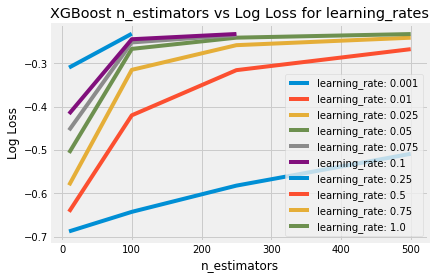

In [51]:
#------------------------------------------------------------------------------------------
    #6.4 Display Gridsearch results for performance scores
#------------------------------------------------------------------------------------------
print('\n--------------------------------\n6.4 Display grid search results for performance scores')

# Summarize results
print("Best: %f using %s" % (xgb_gridsearch.best_score_, xgb_gridsearch.best_params_))
means = xgb_gridsearch.cv_results_['mean_test_score']
stds = xgb_gridsearch.cv_results_['std_test_score']
params = xgb_gridsearch.cv_results_['params']

print("\nMean test score (standard devidation) with: parameters")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))

for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))

plt.legend()
plt.title("XGBoost n_estimators vs Log Loss for learning_rates")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('XGB_n_estimators_vs_learning_rate.png')

In [52]:
#------------------------------------------------------------------------------------------
    #6.5 Get best XGB estimator
#------------------------------------------------------------------------------------------
print('\n6.5 Best estimator:\n',xgb_gridsearch.best_estimator_)


6.5 Best estimator:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)



--------------------------------
6.6 Fit XGBoost model with best estimator
Model: Fit --> COMPLETED

--------------------------------
6.7 Display feature importances for XGBoost model ...

Preview --> Feature importance: first 5
               feature  importance
59  PRIMARY-05/08/2018    0.281708
66        CD_REP_PARTY    0.180968
42  PRIMARY-03/06/2012    0.094222
26  PRIMARY-03/04/2008    0.059784
13  GENERAL-11/02/2004    0.051143
Feature importance --> COMPLETED

--------------------------------
6.8 Prep for training XGB model
XGBoost prep --> COMPLETED

--------------------------------
6.9 Evaluate XGB model --> display results

Recall 
Baseline: 1.0 
Test: 0.9274 
Train: 0.9257 


Precision 
Baseline: 0.5895 
Test: 0.8793 
Train: 0.8769 


Roc 
Baseline: 0.5 
Test: 0.9616 
Train: 0.9612 



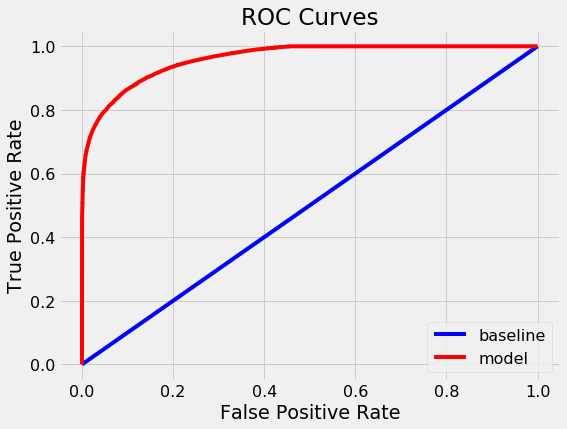


Run Confusion matrix --> display results
Normalized confusion matrix
[[0.81715736 0.18284264]
 [0.07264308 0.92735692]]

Confusion matrix:
 [[32196  7204]
 [ 4110 52468]] 
Classifier report:
 (array([0, 0, 0, ..., 1, 1, 0]), array([0, 0, 0, ..., 1, 1, 0])) 
Roc_auc score:
 0.872257141795891


<Figure size 432x288 with 0 Axes>

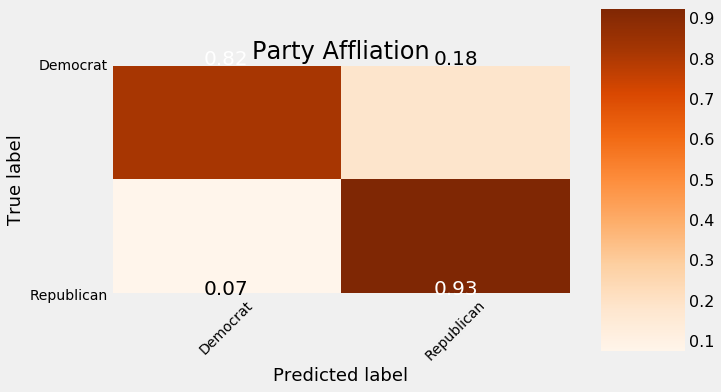

In [53]:
#------------------------------------------------------------------------------------------
    #6.6 Fit XGBoost model with best estimator
#------------------------------------------------------------------------------------------
print('\n--------------------------------\n6.6 Fit XGBoost model with best estimator')
#Apply XGB Best Estimator
xgb_clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#Fit XGB Best Estimator
xgb_clf = xgb_clf.fit(x_train, y_train)
print('Model: Fit --> COMPLETED')

#------------------------------------------------------------------------------------------
    #6.7 Display feature importances for XGBoost model
#------------------------------------------------------------------------------------------
print('\n--------------------------------\n6.7 Display feature importances for XGBoost model ...')
# Extract feature importances
fi_xgb = pd.DataFrame({'feature': features,
                   'importance': xgb_clf.feature_importances_}).\
                    sort_values('importance', ascending = False)
# Display feature importances 
print('\nPreview --> Feature importance: first 5')
print(fi_xgb.head(5))

print('Feature importance --> COMPLETED')

#------------------------------------------------------------------------------------------
    #6.8 Prep for training XGB model
#------------------------------------------------------------------------------------------
print('\n--------------------------------\n6.8 Prep for training XGB model')
# Training predictions (to demonstrate overfitting)
train_xgb_predictions = xgb_clf.predict(x_train)
train_xgb_probs = xgb_clf.predict_proba(x_train)[:, 1]

# Testing predictions (to determine performance)
xgb_predictions = xgb_clf.predict(x_test)
xgb_probs = xgb_clf.predict_proba(x_test)[:, 1]

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

print('XGBoost prep --> COMPLETED')

#------------------------------------------------------------------------------------------
    #6.9 Evaluate XGB model --> display results
#------------------------------------------------------------------------------------------

print('\n--------------------------------\n6.9 Evaluate XGB model --> display results')
#ROC AUC curve
evaluate_model(xgb_predictions, xgb_probs, train_xgb_predictions, train_xgb_probs, y_test, y_train)
plt.savefig('xgb_roc_auc_curve.png')

print('\nRun Confusion matrix --> display results')
# Confusion matrix
cm = confusion_matrix(y_test, xgb_predictions)
clf_report = (y_test, xgb_predictions)
score = roc_auc_score(y_test, xgb_predictions)

plot_confusion_matrix(cm, classes = ['Democrat', 'Republican'],
                      title = 'Party Affliation')

plt.savefig('xgb_cm.png')

print("\nConfusion matrix:\n",cm,
      "\nClassifier report:\n",clf_report,
      "\nRoc_auc score:\n",score)